In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.ar_model import AutoReg

In [400]:
covid = pd.read_csv('Complete_covid19_dataset.csv')

In [401]:
vaccination = pd.read_csv('Covid19-vaccination.csv')

In [402]:
# Check the number of the features and the observations
print('The COVID Dataset shape is',covid.shape)
print('The vaccination Dataset shape is',vaccination.shape)


The COVID Dataset shape is (134459, 67)
The vaccination Dataset shape is (63006, 16)


In [403]:
vaccination.isnull().sum()/len(vaccination)

location                               0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.432927
people_vaccinated                      0.458417
people_fully_vaccinated                0.505555
total_boosters                         0.895042
daily_vaccinations_raw                 0.525077
daily_vaccinations                     0.005174
total_vaccinations_per_hundred         0.432927
people_vaccinated_per_hundred          0.458417
people_fully_vaccinated_per_hundred    0.505555
total_boosters_per_hundred             0.895042
daily_vaccinations_per_million         0.005174
daily_people_vaccinated                0.024728
daily_people_vaccinated_per_hundred    0.024728
dtype: float64

In [404]:
vaccination = vaccination.drop(vaccination[vaccination.total_vaccinations.isna()].index)
vaccination.shape

(35729, 16)

In [405]:
# Create a new dataframe
vaccination1 = vaccination.drop(vaccination[vaccination.people_vaccinated.isna()].index)
vaccination1.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


In [406]:
# plt.subplots(figsize=(12, 12))
# sns.heatmap(vaccination1.corr(), annot=True, square=True)
# plt.title('Correlation between each features in Vaccinations Dataframe')
# plt.show()


In [407]:
vaccination2=vaccination1.drop(vaccination1[vaccination1.people_fully_vaccinated.isna()].index)
vaccination2.shape

(30638, 16)

## Shaprio-Wilk Test 
### To check normal distribution

In [408]:
# Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated'])
w, pvalue

/Users/jinyanhuang/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.18319565057754517, 0.0)

In [409]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w,pvalue = stats.shapiro(vaccination2['total_vaccinations'])
w,pvalue

(0.20982050895690918, 0.0)

In [410]:
# Create a new dataframe 
# Delete the column 'daily_vaccinations' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations.isna()].index)
vaccination3.shape

(33635, 16)

In [411]:
# Create a new dataframe and delete the column 'daily_vaccinations_raw' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations_raw.isna()].index)
vaccination3.shape

(28485, 16)

In [412]:
# Drop the NA values of total vaccinations in covid datatset
covid = covid.drop(covid[covid.total_vaccinations.isna()].index)
covid.shape

(34276, 67)

In [413]:
# Create a temporary df
covid1 = covid.drop(covid[covid.people_vaccinated.isna()].index)
covid1.shape

(32410, 67)

In [414]:
# Select the columns that related to the population death rates
new1=covid1.loc[:,'total_deaths':'new_deaths_smoothed_per_million']
new1

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100
...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047


In [415]:
# Select the columns that related to the numbers of vaccinated people population
new2=covid1.loc[:,'total_vaccinations':'new_people_vaccinated_smoothed']
new2

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed
364,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
370,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0
386,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0
408,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0
423,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134453,6165714.0,3469198.0,2696516.0,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0
134454,6190303.0,3484207.0,2706096.0,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0
134455,6228119.0,3515140.0,2712979.0,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0
134457,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0


In [416]:
# Create a new dataframe that includes the country names
new3=covid1.loc[:,'location']
new3

364       Afghanistan
370       Afghanistan
386       Afghanistan
408       Afghanistan
423       Afghanistan
             ...     
134453       Zimbabwe
134454       Zimbabwe
134455       Zimbabwe
134457       Zimbabwe
134458       Zimbabwe
Name: location, Length: 32410, dtype: object

In [417]:
# Concat three dataframes
new_df_part4=pd.concat([new1,new2,new3], axis=1)
new_df_part4

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,location
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022,0.0,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,Afghanistan
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039,8200.0,...,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,Afghanistan
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032,54000.0,...,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,Afghanistan
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100,120000.0,...,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,Afghanistan
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100,240000.0,...,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104,6165714.0,...,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0,Zimbabwe
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066,6190303.0,...,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0,Zimbabwe
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066,6228119.0,...,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0,Zimbabwe
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047,6310431.0,...,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,Zimbabwe


In [418]:
# Group data by 'people_vaccinated', and sort them in location
Order_people_vaccinations = vaccination.groupby('location').people_vaccinated.max()
Order_people_vaccinations= Order_people_vaccinations.sort_values(ascending=False)
Order_people_vaccinations= pd.DataFrame(Order_people_vaccinations)
Order_people_vaccinations.head(20)

,people_vaccinated
location,
World,4.197512e+09
Asia,2.882381e+09
Upper middle income,1.883448e+09
Lower middle income,1.390193e+09
China,1.225000e+09
High income,8.904829e+08
India,7.669880e+08
Europe,4.622119e+08
North America,3.780404e+08


In [419]:
# Calculate total vaccinations rate of first five countries
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_total_vacc = Order_people_vaccinations.iloc[[4,6,11,12,14,15,16,17,18],:]
first_five_total_vacc['location'] = first_five_total_vacc.index
first_five_total_vacc

/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/4155894652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_total_vacc['location'] = first_five_total_vacc.index


,people_vaccinated,location
location,,
China,1.225000e+09,China
India,7.669880e+08,India
United States,2.302987e+08,United States
Brazil,1.624368e+08,Brazil
Indonesia,1.344183e+08,Indonesia
Japan,9.954649e+07,Japan
Pakistan,7.884517e+07,Pakistan
Mexico,7.586211e+07,Mexico
Vietnam,6.670689e+07,Vietnam


In [420]:
# Group data by 'people_vaccinated_per_hundred', and sort them in location
Order_fully_vaccinations_hundred = vaccination.groupby('location').people_vaccinated_per_hundred.max()
Order_fully_vaccinations_hundred= Order_fully_vaccinations_hundred.sort_values(ascending=False)
Order_fully_vaccinations_hundred= pd.DataFrame(Order_fully_vaccinations_hundred)
Order_fully_vaccinations_hundred.head(20)

,people_vaccinated_per_hundred
location,
Gibraltar,121.37
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47
Portugal,89.04
Chile,87.38
Cayman Islands,86.25


In [421]:
# Top 5 countries of people vaccinated per hundred
Order_fully_vaccinations_hundred_top = Order_fully_vaccinations_hundred[1:6]
Order_fully_vaccinations_hundred_top

,people_vaccinated_per_hundred
location,
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47


In [422]:
# Extract only three columns.
temp1=vaccination.loc[:,['location', 'date', 'people_fully_vaccinated_per_hundred']]
temp1

,location,date,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,NaN
6,Afghanistan,2021-02-28,NaN
22,Afghanistan,2021-03-16,NaN
44,Afghanistan,2021-04-07,NaN
59,Afghanistan,2021-04-22,NaN
...,...,...,...
63000,Zimbabwe,2021-11-16,17.98
63002,Zimbabwe,2021-11-18,18.07
63003,Zimbabwe,2021-11-19,18.14
63004,Zimbabwe,2021-11-20,18.18


In [423]:
temp1_Pitcairn=temp1[temp1.location == 'Pitcairn']
temp1_United_Arab_Emirates=temp1[temp1.location == 'United Arab Emirates']
temp1_Singapore=temp1[temp1.location == 'Singapore']
temp1_Brunei=temp1[temp1.location == 'Brunei']
temp1_Cuba=temp1[temp1.location == 'Cuba']

In [424]:
temp1_United_Arab_Emirates.sort_values(by = 'people_fully_vaccinated_per_hundred', ascending= True)
temp1_Pitcairn.sort_values(by = 'people_fully_vaccinated_per_hundred', ascending= True)
temp1_Singapore.sort_values(by = 'people_fully_vaccinated_per_hundred', ascending= True)

,location,date,people_fully_vaccinated_per_hundred
50584,Singapore,2021-01-27,0.00
50588,Singapore,2021-01-31,0.00
50590,Singapore,2021-02-02,0.11
50598,Singapore,2021-02-10,0.11
50606,Singapore,2021-02-18,2.02
...,...,...,...
50820,Singapore,2021-09-20,NaN
50821,Singapore,2021-09-21,NaN
50822,Singapore,2021-09-22,NaN
50823,Singapore,2021-09-23,NaN


In [425]:
# Temporary to delete the temp dataframe 0 value
temp1_United_Arab_Emirates=temp1_United_Arab_Emirates.drop(temp1_United_Arab_Emirates[temp1_United_Arab_Emirates.people_fully_vaccinated_per_hundred == 0].index)
temp1_Singapore=temp1_Singapore.drop(temp1_Singapore[temp1_Singapore.people_fully_vaccinated_per_hundred == 0].index)

In [426]:
# Group data by 'daily_vaccinations', and sort them in location
Order_daily_vaccinations= vaccination.groupby('location').daily_vaccinations.max()
Order_daily_vaccinations= Order_daily_vaccinations.sort_values(ascending=False)
Order_daily_vaccinations= pd.DataFrame(Order_daily_vaccinations)
Order_daily_vaccinations.head(20)

,daily_vaccinations
location,
World,43233999.0
Asia,33335736.0
Upper middle income,27439252.0
China,22424286.0
Lower middle income,16674499.0
India,10037995.0
High income,8397153.0
Europe,5128678.0
North America,4173238.0


In [427]:
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_daily_vacc=Order_daily_vaccinations.iloc[[3,5,11,12,13,14,15,16,17,18],:]
first_five_daily_vacc['location'] = first_five_daily_vacc.index
first_five_daily_vacc

/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/2424294992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_daily_vacc['location'] = first_five_daily_vacc.index


,daily_vaccinations,location
location,,
China,22424286.0,China
India,10037995.0,India
United States,3499189.0,United States
Brazil,2595170.0,Brazil
Africa,2030907.0,Africa
Japan,1997542.0,Japan
Indonesia,1901294.0,Indonesia
Mexico,1648223.0,Mexico
Vietnam,1632517.0,Vietnam


# Time Series: Arima Model 

In [428]:
#Create new columns based on distinct values/ start of each new location and count them
vaccination_arima = vaccination.sort_values('location')
vaccination_arima['eid'] = (vaccination_arima.groupby(['location']).cumcount()==0).astype(int)

# Cumulatively sum the 'eid' column to assign a unique identifier to each location group
vaccination_arima['eid'] =vaccination_arima['eid'].cumsum()
vaccination_arima

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,1
265,Afghanistan,AFG,2021-11-14,4018197.0,3530173.0,3188609.0,NaN,NaN,36635.0,10.09,8.86,8.00,NaN,920.0,60035.0,0.151,1
220,Afghanistan,AFG,2021-09-30,2369625.0,828601.0,NaN,NaN,NaN,12999.0,5.95,2.08,NaN,NaN,326.0,1853.0,0.005,1
190,Afghanistan,AFG,2021-08-31,1979652.0,773002.0,NaN,NaN,NaN,70761.0,4.97,1.94,NaN,NaN,1776.0,224.0,0.001,1
179,Afghanistan,AFG,2021-08-20,1201286.0,770542.0,430744.0,NaN,NaN,1119.0,3.02,1.93,1.08,NaN,28.0,690.0,0.002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62827,Zimbabwe,ZWE,2021-05-27,953367.0,648119.0,305248.0,NaN,16349.0,9665.0,6.32,4.29,2.02,NaN,640.0,3614.0,0.024,235
62828,Zimbabwe,ZWE,2021-05-28,976774.0,656628.0,320146.0,NaN,23407.0,10389.0,6.47,4.35,2.12,NaN,688.0,3755.0,0.025,235
62829,Zimbabwe,ZWE,2021-05-29,1002443.0,666784.0,335659.0,NaN,25669.0,13559.0,6.64,4.42,2.22,NaN,898.0,5052.0,0.033,235
62813,Zimbabwe,ZWE,2021-05-13,751998.0,559873.0,192125.0,NaN,21655.0,20666.0,4.98,3.71,1.27,NaN,1369.0,11672.0,0.077,235


In [429]:
vaccination_arima[vaccination_arima.location == 'United States'].eid.unique()


array([223])

In [430]:
number_united_states = vaccination_arima.loc[vaccination_arima['eid']==223]

united_states = number_united_states.sort_values('people_vaccinated_per_hundred')

united_states

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
59528,United States,USA,2020-12-13,21800.0,18529.0,3875.0,NaN,NaN,NaN,0.01,0.01,0.00,NaN,NaN,NaN,NaN,223
59529,United States,USA,2020-12-14,26124.0,22716.0,3971.0,NaN,4324.0,4324.0,0.01,0.01,0.00,NaN,13.0,4187.0,0.001,223
59530,United States,USA,2020-12-15,74833.0,69226.0,4166.0,NaN,48709.0,26516.0,0.02,0.02,0.00,NaN,79.0,25348.0,0.008,223
59531,United States,USA,2020-12-16,233645.0,222604.0,4548.0,NaN,158812.0,70615.0,0.07,0.07,0.00,NaN,210.0,68025.0,0.020,223
59532,United States,USA,2020-12-17,504183.0,486107.0,5110.0,NaN,270538.0,120596.0,0.15,0.14,0.00,NaN,359.0,116894.0,0.035,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59867,United States,USA,2021-11-17,449028238.0,229584222.0,194561634.0,33834775.0,1479995.0,1297921.0,133.51,68.26,57.85,10.06,3859.0,444416.0,0.132,223
59868,United States,USA,2021-11-18,450381454.0,229972864.0,194694936.0,34677686.0,1353216.0,1288385.0,133.91,68.38,57.89,10.31,3831.0,427578.0,0.127,223
59869,United States,USA,2021-11-19,451355421.0,230255670.0,194788580.0,35282993.0,973967.0,1174321.0,134.20,68.46,57.92,10.49,3492.0,383614.0,0.114,223
59870,United States,USA,2021-11-20,451453834.0,230298744.0,194797007.0,35329604.0,98413.0,1039368.0,134.23,68.48,57.92,10.50,3090.0,321539.0,0.096,223


In [431]:
Value_united_states = united_states['people_vaccinated_per_hundred'].values
Value_united_states

array([1.000e-02, 1.000e-02, 2.000e-02, 7.000e-02, 1.400e-01, 2.600e-01,
       3.200e-01, 3.500e-01, 4.600e-01, 5.900e-01, 7.600e-01, 8.100e-01,
       8.200e-01, 8.600e-01, 8.900e-01, 1.060e+00, 1.270e+00, 1.510e+00,
       1.630e+00, 1.660e+00, 1.730e+00, 1.770e+00, 1.950e+00, 2.160e+00,
       2.410e+00, 2.660e+00, 2.910e+00, 3.020e+00, 3.080e+00, 3.290e+00,
       3.560e+00, 3.870e+00, 4.210e+00, 4.550e+00, 4.720e+00, 4.790e+00,
       4.980e+00, 5.270e+00, 5.620e+00, 6.020e+00, 6.440e+00, 6.660e+00,
       6.750e+00, 7.000e+00, 7.320e+00, 7.690e+00, 8.100e+00, 8.500e+00,
       8.730e+00, 8.830e+00, 9.060e+00, 9.340e+00, 9.720e+00, 1.013e+01,
       1.054e+01, 1.079e+01, 1.087e+01, 1.112e+01, 1.143e+01, 1.180e+01,
       1.218e+01, 1.259e+01, 1.284e+01, 1.295e+01, 1.313e+01, 1.337e+01,
       1.365e+01, 1.390e+01, 1.414e+01, 1.432e+01, 1.440e+01, 1.459e+01,
       1.485e+01, 1.523e+01, 1.569e+01, 1.619e+01, 1.653e+01, 1.669e+01,
       1.705e+01, 1.749e+01, 1.801e+01, 1.859e+01, 

In [432]:
print(f'\nThe ADFuller is {100*adfuller(Value_united_states)[1]:3.2f}%')


The ADFuller is 9.81%


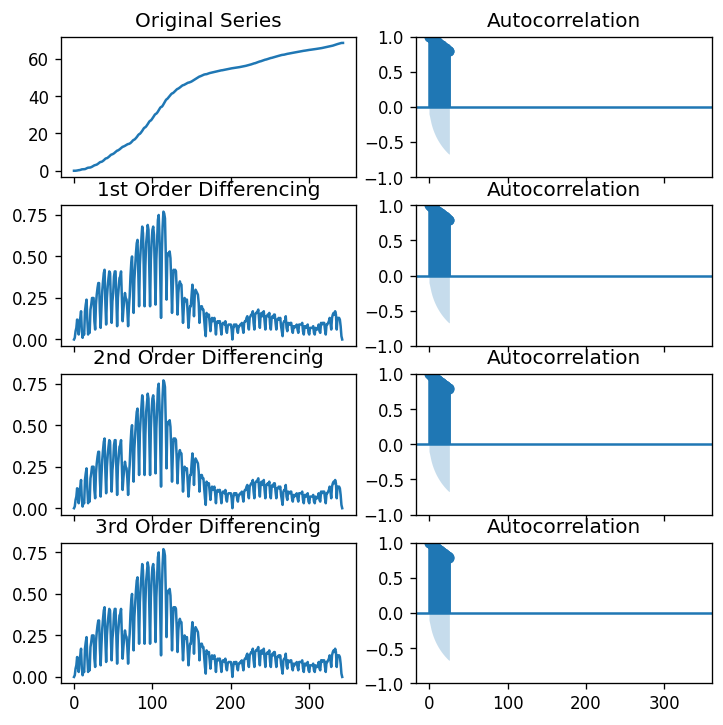

In [433]:
plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':120})

# Original Series
fig,axes = plt.subplots(4,2,sharex= True)
axes[0,0].plot(Value_united_states);axes[0,0].set_title('Original Series')
plot_acf(Value_united_states, ax= axes[0,1])

# First Order Differencing 

axes[1,0].plot(np.diff(Value_united_states));axes[1,0].set_title('1st Order Differencing')
plot_acf(Value_united_states, ax= axes[1,1])
diffval = np.diff(Value_united_states)


# Second Order Differencing

axes[2,0].plot(np.diff(Value_united_states));axes[2,0].set_title('2nd Order Differencing')
plot_acf(Value_united_states, ax= axes[2,1])
diffval1 = np.diff(diffval)


# Third Order Differencing

axes[3,0].plot(np.diff(Value_united_states));axes[3,0].set_title('3rd Order Differencing')
plot_acf(Value_united_states, ax= axes[3,1])
diffval2 = np.diff(diffval1)




In [434]:
model=pm.auto_arima(Value_united_states,start_p=1,start_q=1,
test='adf',
max_p=4, max_q=4,
m=1,
d=None,
seasonal=False,
start_P=0,
alpha=0.001,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-748.796, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-711.986, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-717.905, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-727.220, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-713.986, Time=0.00 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-846.815, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-759.470, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-855.893, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-773.471, Time=0.06 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-909.229, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-827.563, Time=0.08 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-883.048, Time=0.21 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-911.223, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-857.886, Time=0.05 sec
 ARIMA(4,2,0)(0

## WE choose the model arima (4,2,4)

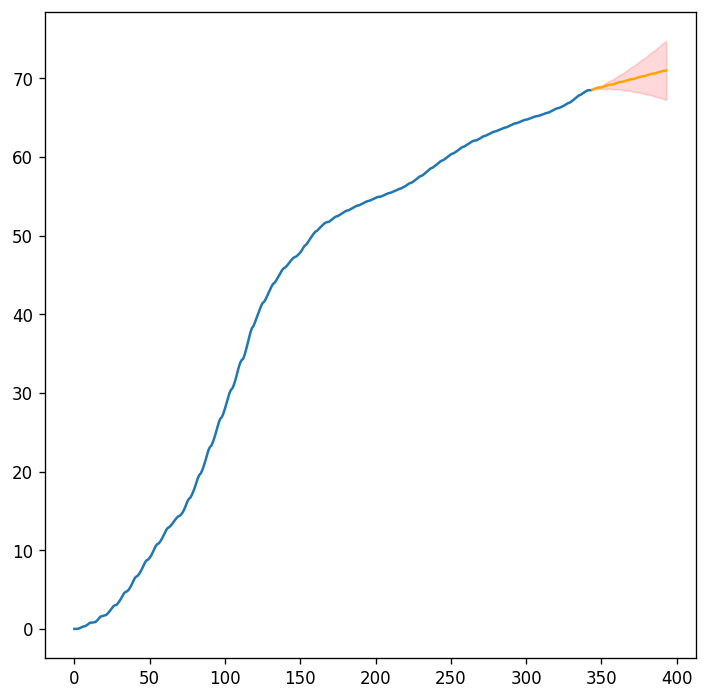

In [435]:
# Forecase 
n_periods = 50

# predict model 
fc,confint = model.predict(n_periods = n_periods, return_conf_int = True, alpha = 0.5)
index_of_fc = np.arange(len(Value_united_states),len(Value_united_states)+n_periods)


fc_series = pd.Series(fc,index = index_of_fc)
lower_series = pd.Series(confint[:,0],index = index_of_fc)
upper_series = pd.Series(confint[:,1],index = index_of_fc)

# PLot
plt.plot(Value_united_states)
plt.plot(fc_series, color = 'orange')
plt.fill_between(lower_series.index,lower_series,upper_series,color = 'red',alpha = 0.15)
plt.show()


In [436]:
# Get the final day's people_vaccinated_per_hundred

final_day_vacc_rate_US = Value_united_states[-1]/100
final_day_vacc_rate_US

0.6848000000000001

In [437]:
#  Get the population of the United States 
united_states_population = float(covid[covid.location == 'United States'].population.unique())
print('The population of the US is', float(united_states_population))


The population of the US is 332915074.0


/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/3360495347.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  united_states_population = float(covid[covid.location == 'United States'].population.unique())


In [438]:
base_case_US = fc_series/100 -final_day_vacc_rate_US
base_case_total_US = fc_series/100
base_case_increase_US = base_case_US * united_states_population
base_case_num_of_total_US = base_case_total_US * united_states_population


base_case_summary_df = pd.concat([base_case_increase_US,base_case_num_of_total_US],axis = 1)
base_case_summary_df.columns = ['Base Case of Number of vaccinated rate in 100 days (only in these 100 days)','Base Case of total vaccinated rate from the beggining to the next 100 days']
base_case_summary_df = base_case_summary_df.reset_index().iloc[:,1:]




In [439]:
base_case_summary_df

,Base Case of Number of vaccinated rate in 100 days (only in these 100 days),Base Case of total vaccinated rate from the beggining to the next 100 days
0,1.805158e+05,2.281608e+08
1,4.729835e+05,2.284532e+08
2,7.070118e+05,2.286873e+08
3,9.171322e+05,2.288974e+08
4,1.111116e+06,2.290914e+08
5,1.171247e+06,2.291515e+08
6,1.179441e+06,2.291597e+08
7,1.346034e+06,2.293263e+08
8,1.624062e+06,2.296043e+08
9,1.852358e+06,2.298326e+08


In [440]:
#lower_series --- worst case

worst_case = lower_series/100 - final_day_vacc_rate_US
worst_case_total = lower_series/100
worst_case_increase_num = worst_case* united_states_population
worst_case_num_total = worst_case_total* united_states_population
worst_case_summary_df = pd.concat([worst_case_increase_num, worst_case_num_total],axis=1)
worst_case_summary_df.columns = ['Worst Case of Number of vaccinated rate in 50 days (only in these 50 days)','Worst Case of Total Vaccinated rate from begining to the next 50 days']
worst_case_summary_df = worst_case_summary_df.reset_index().iloc[:,1:]
worst_case_summary_df




,Worst Case of Number of vaccinated rate in 50 days (only in these 50 days),Worst Case of Total Vaccinated rate from begining to the next 50 days
0,7.840898e+04,2.280587e+08
1,2.624903e+05,2.282427e+08
2,3.912462e+05,2.283715e+08
3,4.992102e+05,2.284795e+08
4,5.935762e+05,2.285738e+08
5,5.500562e+05,2.285303e+08
6,4.318166e+05,2.284121e+08
7,4.389201e+05,2.284192e+08
8,5.389081e+05,2.285192e+08
9,5.876273e+05,2.285679e+08


In [441]:
best_case=upper_series/100-final_day_vacc_rate_US
best_case_total=upper_series/100
best_case_increase_num=best_case* united_states_population
best_case_num_total=best_case_total* united_states_population
best_case_summary_df = pd.concat([best_case_increase_num,best_case_num_total],axis=1)
best_case_summary_df.columns=['Best Case of Number of vaccinated rate in 50 days (only in these 50 days)','Best Case of Total Vaccinated rate from begining to the next 50 days']
best_case_summary_df=best_case_summary_df.reset_index().iloc[:,1:]
best_case_summary_df


,Best Case of Number of vaccinated rate in 50 days (only in these 50 days),Best Case of Total Vaccinated rate from begining to the next 50 days
0,2.826226e+05,2.282629e+08
1,6.834767e+05,2.286637e+08
2,1.022777e+06,2.290030e+08
3,1.335054e+06,2.293153e+08
4,1.628656e+06,2.296089e+08
5,1.792438e+06,2.297727e+08
6,1.927066e+06,2.299073e+08
7,2.253147e+06,2.302334e+08
8,2.709216e+06,2.306895e+08
9,3.117088e+06,2.310973e+08



Best-Case Scenario: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (282622 people get vaccinated) to the final day (2318170 people get vaccinated in these 50 days. JUST IN THESE 50 DAYS), in other words, the from now on to the next 50 days, there will 20822310 people get vaccinated .

 This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 248802500 for the whole time period from very beginning to the next 50 days. 

# Canada case

In [457]:
number_canada = vaccination_arima.loc[vaccination_arima['eid']==38]

canada = number_canada.sort_values('people_vaccinated_per_hundred')

location                                0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                15
total_boosters                         59
daily_vaccinations_raw                  1
daily_vaccinations                      1
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred    15
total_boosters_per_hundred             59
daily_vaccinations_per_million          1
daily_people_vaccinated                 1
daily_people_vaccinated_per_hundred     1
eid                                     0
dtype: int64

In [443]:
value_canada = canada['people_vaccinated_per_hundred'].values
value_canada

array([0.000e+00, 0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 6.000e-02, 7.000e-02, 9.000e-02, 1.200e-01, 1.300e-01,
       1.300e-01, 1.400e-01, 1.500e-01, 1.900e-01, 2.300e-01, 2.600e-01,
       2.800e-01, 2.900e-01, 3.000e-01, 3.600e-01, 4.100e-01, 4.800e-01,
       5.800e-01, 6.900e-01, 7.800e-01, 8.400e-01, 9.400e-01, 1.020e+00,
       1.080e+00, 1.180e+00, 1.300e+00, 1.390e+00, 1.460e+00, 1.570e+00,
       1.670e+00, 1.750e+00, 1.850e+00, 1.930e+00, 1.990e+00, 2.020e+00,
       2.060e+00, 2.120e+00, 2.150e+00, 2.190e+00, 2.220e+00, 2.240e+00,
       2.250e+00, 2.290e+00, 2.310e+00, 2.320e+00, 2.340e+00, 2.360e+00,
       2.380e+00, 2.400e+00, 2.430e+00, 2.450e+00, 2.480e+00, 2.510e+00,
       2.550e+00, 2.580e+00, 2.590e+00, 2.590e+00, 2.610e+00, 2.630e+00,
       2.650e+00, 2.710e+00, 2.800e+00, 2.880e+00, 2.960e+00, 3.040e+00,
       3.120e+00, 3.230e+00, 3.380e+00, 3.520e+00, 3.630e+00, 3.750e+00,
       3.920e+00, 4.100e+00, 4.290e+00, 4.510e+00, 

In [444]:
print(f'\nThe ADFuller is {100*adfuller(value_canada)[1]:3.2f}%')


The ADFuller is 51.96%


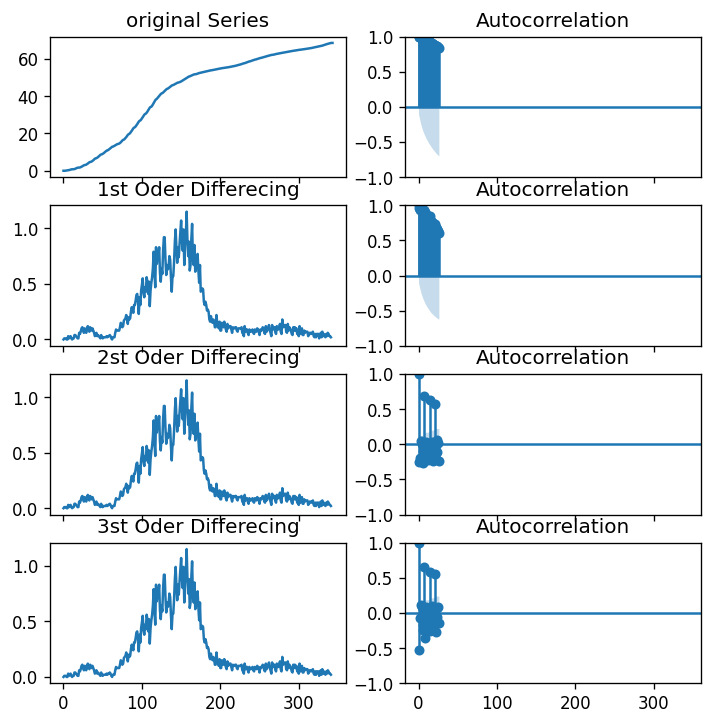

In [445]:
plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':120})

#original Series
fig, axes = plt.subplots(4,2,sharex=True)
axes[0,0].plot(Value_united_states); axes[0,0].set_title('original Series')
plot_acf(value_canada,ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(np.diff(value_canada));axes[1,0].set_title('1st Oder Differecing')
plot_acf(np.diff(value_canada),ax=axes[1,1])
diffval=np.diff(value_canada)


# 2st Differencing
axes[2,0].plot(np.diff(value_canada));axes[2,0].set_title('2st Oder Differecing')
plot_acf(np.diff(diffval),ax=axes[2,1])
diffva2=np.diff(diffval)


# 3st Differencing
axes[3,0].plot(np.diff(value_canada));axes[3,0].set_title('3st Oder Differecing')
plot_acf(np.diff(diffva2),ax=axes[3,1])
diffv3=np.diff(diffva2)

plt.show()

In [460]:
model1 = pm.auto_arima(value_canada,start_p = 1, start_q = 1,
    test = 'adf',
    max_p = 4, max_q = 4,
    d = None,
    seasonal = False,
    start_P = 0,
    D = 0,
    alpha = 0.001,
    trace = True,
    error_action = 'ignore',
    suppress_warnings = True,
    stepwise = True
)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-827.550, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-774.375, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-794.401, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-817.567, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-829.741, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-818.651, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-827.765, Time=0.11 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-827.927, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-829.936, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-831.341, Time=0.05 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-829.977, Time=0.55 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-834.738, Time=0.21 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-856.348, Time=0.22 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

## WE choose the model arima (4,2,2)

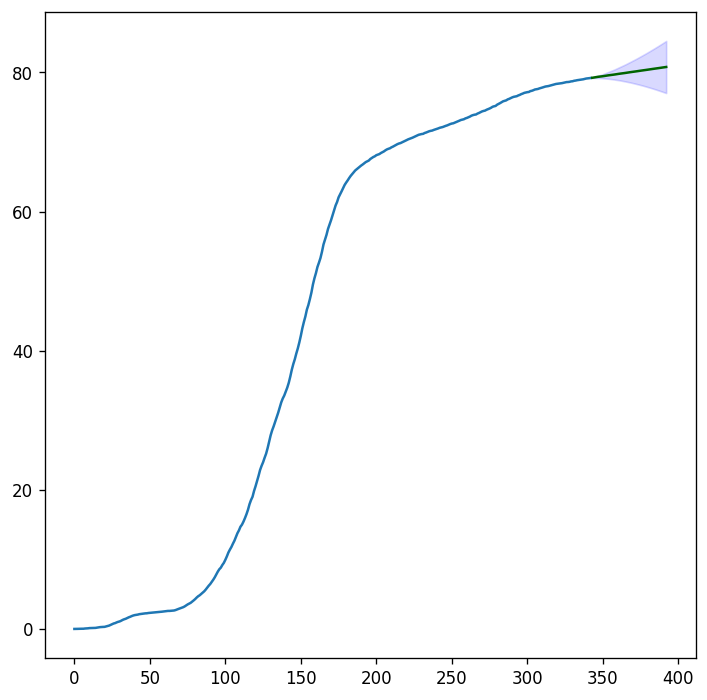

In [461]:
# Forecase
n_periods= 50
# predict model
fc, confint = model1.predict(n_periods=n_periods,return_conf_int=True, alpha=0.5)
index_of_fc=np.arange(len(value_canada),len(value_canada)+n_periods)

fc_series = pd.Series(fc, index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)

#Plot
plt.plot(value_canada)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, lower_series, upper_series,color='b',alpha=.15)
plt.show()


In [448]:
# get the final day's people_vaccinated_per_hundred
final_day_vacc_rate=value_canada[-1]/100
final_day_vacc_rate

0.7920999999999999

In [449]:
# Get the population of the Canada
canada_population=float(covid[covid.location =='Canada'].population.unique())
print ('The Population of Canada is',float(covid[covid.location =='Canada'].population.unique()))

# Get the population of the UK
UK_population=float(covid[covid.location =='United Kingdom'].population.unique())
print ('The Population of UK is',float(covid[covid.location =='United Kingdom'].population.unique()))

The Population of Canada is 38067913.0
The Population of UK is 68207114.0


/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/3790732036.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  canada_population=float(covid[covid.location =='Canada'].population.unique())
/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/3790732036.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('The Population of Canada is',float(covid[covid.location =='Canada'].population.unique()))
/var/folders/ys/__80j13x36jdpb9j1fd0t3jr0000gn/T/ipykernel_19985/3790732036.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a s

In [450]:
# forecast the base case of the increase number of people vaccinated per hundard rate in 50 days
base_case = fc_series/100-final_day_vacc_rate
base_case_total = fc_series/100
base_case_increase_num=base_case*canada_population
base_case_num_total=base_case_total*canada_population

base_case_summary_df = pd.concat([base_case_increase_num,base_case_num_total],axis=1)
base_case_summary_df.columns=['Base Case of Number of vaccinated rate in 50 days (only in these 50 days)','Base Case of Total Vaccinated rate from begining to the next 50 days']
base_case_summary_df = base_case_summary_df.reset_index().iloc[:,1:]
base_case_summary_df

,Base Case of Number of vaccinated rate in 50 days (only in these 50 days),Base Case of Total Vaccinated rate from begining to the next 50 days
0,10516.911136,3.016411e+07
1,24137.326584,3.017773e+07
2,38325.718842,3.019192e+07
3,52506.435638,3.020610e+07
4,65058.549864,3.021865e+07
5,75461.665102,3.022906e+07
6,85253.502426,3.023885e+07
7,95909.645934,3.024950e+07
8,108146.001947,3.026174e+07
9,121707.706214,3.027530e+07


In [451]:
#lower_series --- worst case

worst_case = lower_series/100 - final_day_vacc_rate
worst_case_total = lower_series/100
worst_case_increase_num = worst_case*canada_population
worst_case_num_total = worst_case_total*canada_population
worst_case_summary_df = pd.concat([worst_case_increase_num, worst_case_num_total],axis=1)
worst_case_summary_df.columns = ['Worst Case of Number of vaccinated rate in 50 days (only in these 50 days)','Worst Case of Total Vaccinated rate from begining to the next 50 days']
worst_case_summary_df = worst_case_summary_df.reset_index().iloc[:,1:]
worst_case_summary_df


,Worst Case of Number of vaccinated rate in 50 days (only in these 50 days),Worst Case of Total Vaccinated rate from begining to the next 50 days
0,-6152.270318,3.014744e+07
1,-4386.202495,3.014921e+07
2,-1420.714831,3.015217e+07
3,-496.426102,3.015310e+07
4,-998.525478,3.015260e+07
5,-4274.221074,3.014932e+07
6,-10190.123649,3.014340e+07
7,-17040.270455,3.013655e+07
8,-23806.271860,3.012979e+07
9,-30252.787395,3.012334e+07



Best-Case Scenario: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is decrease from the first day (6152 people get vaccinated) to the final day (824870 people get vaccinated in these 50 days. ), in other words, the from now on to the next 50 days, there will 2318170 people get vaccinated.

 This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 32181330 for the whole time period from very beginning to the next 50 days. 

In [452]:
##upper_series

best_case=upper_series/100-final_day_vacc_rate
best_case_total=upper_series/100
best_case_increase_num=best_case*canada_population
best_case_num_total=best_case_total* canada_population
best_case_summary_df = pd.concat([best_case_increase_num,best_case_num_total],axis=1)
best_case_summary_df.columns=['Best Case of Number of vaccinated rate in 50 days (only in these 50 days)','Best Case of Total Vaccinated rate from begining to the next 50 days']
best_case_summary_df=best_case_summary_df.reset_index().iloc[:,1:]
best_case_summary_df

,Best Case of Number of vaccinated rate in 50 days (only in these 50 days),Best Case of Total Vaccinated rate from begining to the next 50 days
0,2.718609e+04,3.018078e+07
1,5.266086e+04,3.020625e+07
2,7.807215e+04,3.023167e+07
3,1.055093e+05,3.025910e+07
4,1.311156e+05,3.028471e+07
5,1.551976e+05,3.030879e+07
6,1.806971e+05,3.033429e+07
7,2.088596e+05,3.036245e+07
8,2.400983e+05,3.039369e+07
9,2.736682e+05,3.042726e+07



Best-Case Scenario: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (27186 people get vaccinated) to the final day (2027737 people get vaccinated in these 50 days. ), in other words, the from now on to the next 50 days, there will 2318170 people get vaccinated.

 This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 32181330 for the whole time period from very beginning to the next 50 days. 